In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/modi-1/rahul_reviews.csv
/kaggle/input/modi-1/modi_reviews.csv


In [2]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

In [4]:
M = pd.read_csv('/kaggle/input/modi-1/modi_reviews.csv')
R = pd.read_csv('/kaggle/input/modi-1/rahul_reviews.csv')

# **DATA AUDIT**

In [5]:
M.shape

(25688, 3)

In [6]:
R.shape

(14261, 3)

In [7]:
M.columns

Index(['Unnamed: 0', 'User', 'Tweet'], dtype='object')

In [8]:
R.columns

Index(['Unnamed: 0', 'User', 'Tweet'], dtype='object')

In [9]:
M.head(5)

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...


In [10]:
M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25688 non-null  int64 
 1   User        25683 non-null  object
 2   Tweet       25683 non-null  object
dtypes: int64(1), object(2)
memory usage: 602.2+ KB


In [11]:
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14261 non-null  int64 
 1   User        14261 non-null  object
 2   Tweet       14261 non-null  object
dtypes: int64(1), object(2)
memory usage: 334.4+ KB


In [45]:
M.describe()

,Unnamed: 0,Polarity
count,17481.000000,17481.000000
mean,12787.767290,0.163602
std,7381.373718,0.331724
min,0.000000,-1.000000
25%,6472.000000,-0.050000
50%,12767.000000,0.162500
75%,19121.000000,0.366667
max,25687.000000,1.000000


In [46]:
R.describe()

,Unnamed: 0,Polarity
count,9367.000000,9367.000000
mean,7110.178072,0.126962
std,4124.211022,0.341890
min,0.000000,-1.000000
25%,3579.000000,-0.095833
50%,7032.000000,0.136364
75%,10678.500000,0.337500
max,14260.000000,1.000000


In [12]:
M['Tweet'] = M['Tweet'].astype(str)
R['Tweet'] = R['Tweet'].astype(str)

In [13]:
R.head(5)

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


In [14]:
TextBlob(M['Tweet'][0]).sentiment

Sentiment(polarity=0.35, subjectivity=0.36250000000000004)

In [15]:
TextBlob(R['Tweet'][10]).sentiment

Sentiment(polarity=-0.3814697265625, subjectivity=0.375)

In [16]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [17]:
M['Polarity'] = M['Tweet'].apply(find_polarity)
R['Polarity'] = R['Tweet'].apply(find_polarity)

In [18]:
M.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788


In [19]:
R.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667


In [20]:
M['Label'] = np.where(M['Polarity']>0,'positive','negative')
M['Label'][M['Polarity']==0]='Nuetral'

/tmp/ipykernel_33/15969392.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  M['Label'][M['Polarity']==0]='Nuetral'
/tmp/ipykernel_33/15969392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [21]:
R['Label'] = np.where(R['Polarity']>0,'positive','negative')
R['Label'][R['Polarity']==0]='Nuetral'

/tmp/ipykernel_33/2228498952.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  R['Label'][R['Polarity']==0]='Nuetral'
/tmp/ipykernel_33/2228498952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [22]:
neutral_m = M[M['Polarity']==0.000]
remove_neutral_m = M['Polarity'].isin(neutral_m['Polarity'])


In [23]:
M = M[~remove_neutral_m]

In [24]:
print(neutral_m.shape)
print(M.shape)

(8207, 5)
(17481, 5)


In [25]:
neutral_r = R[R['Polarity']==0.000]
remove_neutral_r = R['Polarity'].isin(neutral_r['Polarity'])
R = R[~remove_neutral_r]
print(neutral_r.shape)
print(R.shape)

(4894, 5)
(9367, 5)


In [26]:
print(M.shape)
print(R.shape)

(17481, 5)
(9367, 5)


**As data is Imbalanced we need to balance it**

In [27]:
# Modi reviews
np.random.seed(10)
remove_n = 8481
drop_indices = np.random.choice(M.index,remove_n,replace=False)
df_M = M.drop(drop_indices)

In [28]:
df_M.shape

(9000, 5)

In [29]:
# Modi reviews
np.random.seed(10)
remove_n = 367
drop_indices1 = np.random.choice(R.index,remove_n,replace=False)
df_R = R.drop(drop_indices1)

In [30]:
df_R.shape

(9000, 5)

In [31]:
print(df_M.shape)
print(df_R.shape)

(9000, 5)
(9000, 5)


# **Training the prediction model**

In [32]:
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

In [33]:
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [34]:
M_tweets = " ".join(M['Tweet'])

In [35]:
R_tweets = " ".join(R['Tweet'])

In [36]:
cleaned_comments1= preprocess_text(M_tweets)

In [37]:
cleaned_comments2= preprocess_text(R_tweets)

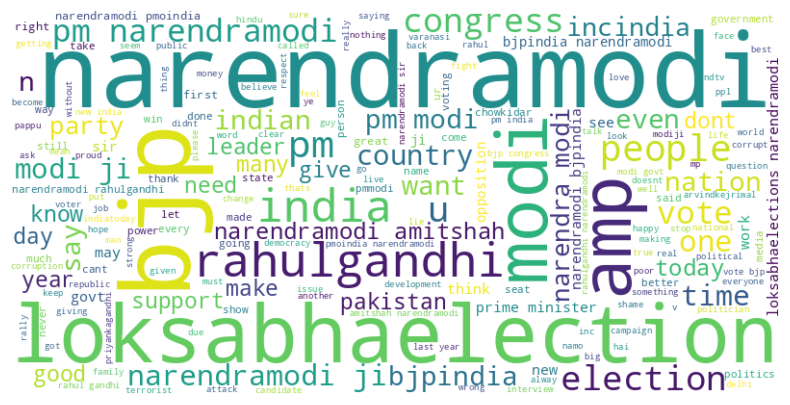

In [38]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_comments1)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

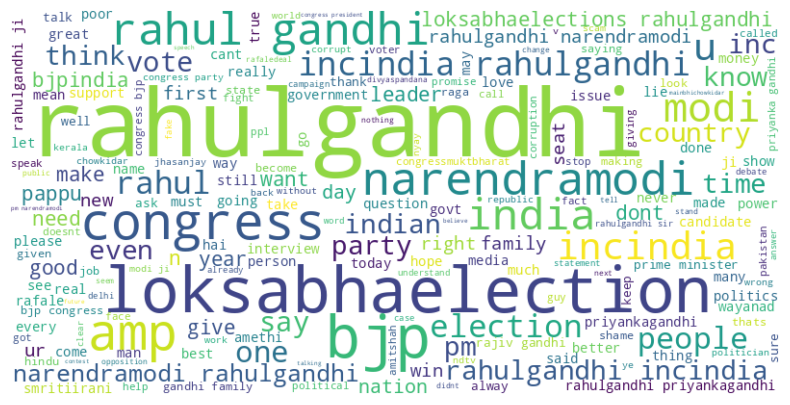

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_comments2)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [40]:
M_count = df_M.groupby('Label').count()


In [41]:
R_count = df_R.groupby('Label').count()

In [42]:
# Converting Polarity into percentage
negative_reviews_for_modi = (M_count['Polarity'][0] / 1000) * 100
negative_reviews_for_modi = round(negative_reviews_for_modi, 2)
positive_reviews_for_modi = (M_count['Polarity'][1] / 1000) * 100
positive_reviews_for_modi = round(positive_reviews_for_modi, 2) 

/tmp/ipykernel_33/557234793.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negative_reviews_for_modi = (M_count['Polarity'][0] / 1000) * 100
/tmp/ipykernel_33/557234793.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_reviews_for_modi = (M_count['Polarity'][1] / 1000) * 100


In [43]:
negative_reviews_for_rahul = (R_count['Polarity'][0] / 1000) * 100

positive_reviews_for_rahul = (R_count['Polarity'][1] / 1000) * 100


/tmp/ipykernel_33/2704461860.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negative_reviews_for_rahul = (R_count['Polarity'][0] / 1000) * 100
/tmp/ipykernel_33/2704461860.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_reviews_for_rahul = (R_count['Polarity'][1] / 1000) * 100


In [44]:
politician_list = ['BJP - Modi','INC - Rahul']
negative_review_list = [negative_reviews_for_modi,negative_reviews_for_rahul]
positive_review_list =[positive_reviews_for_modi,positive_reviews_for_rahul]

fig = go.Figure(
    data =[
        go.Bar(name='Negative',x=politician_list,y=negative_review_list),
        go.Bar(name='Positive',x=politician_list,y=positive_review_list)
        
    ]
)
fig.update_layout(barmode='group')
fig.show()